In [1]:
# Marketing Campaign Performance Analysis (EDA)

## Objective
# To explore customer demographics, purchase behavior, and marketing campaign responses
# in order to identify factors influencing campaign performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [3]:
df = pd.read_excel("marketing_data.xlsx")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [4]:
df.shape

(2240, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
print(df.describe(include="all"))

                  ID   Year_Birth   Education Marital_Status        Income   \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   
std      3246.662198    11.984069         NaN            NaN   25173.076661   

            Kidhome     Teenhome                   

Identify Data Issues

In [7]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Data Quality Issues Identified
- Extra spaces in column names (Income)
- Missing values in Income column
- No direct Age column

## **Data Cleaning**

In [9]:
#Fixing blank spaces in columns
df.columns = df.columns.str.strip().str.replace(" ", "")
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
#Finding missing 'Income' values
df["Income"].isnull().sum()

np.int64(24)

In [11]:
#Handling the missing values by using 'fillna' with median values from other rows
df["Income"].fillna(df["Income"].median(), inplace=True)

C:\Users\Paul\AppData\Local\Temp\ipykernel_16396\555745128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


In [12]:
#Creating Age Column from Date Of Birth
df["Age"] = 2024 - df["Year_Birth"]
df["Age"]

0       54
1       63
2       66
3       57
4       35
        ..
2235    48
2236    47
2237    48
2238    46
2239    55
Name: Age, Length: 2240, dtype: int64

Feature Engineering

In [13]:
df["Total_Spend"] = (
    df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
    df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
)

df["Total_Purchases"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

In [14]:
df["Total_Spend"], df["Total_Purchases"]

(0       1190
 1        577
 2        251
 3         11
 4         91
         ... 
 2235     689
 2236      55
 2237     309
 2238    1383
 2239    1078
 Name: Total_Spend, Length: 2240, dtype: int64,
 0       14
 1       17
 2       10
 3        3
 4        6
         ..
 2235    18
 2236     4
 2237    12
 2238    19
 2239    17
 Name: Total_Purchases, Length: 2240, dtype: int64)

Data Clean Verification

In [15]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Total_Spend            0
Total_Purchases        0
dtype: int64


Final Cleaned Dataset

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Spend,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,54,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,63,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,66,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,57,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,35,91,6


## **EDA Charts**

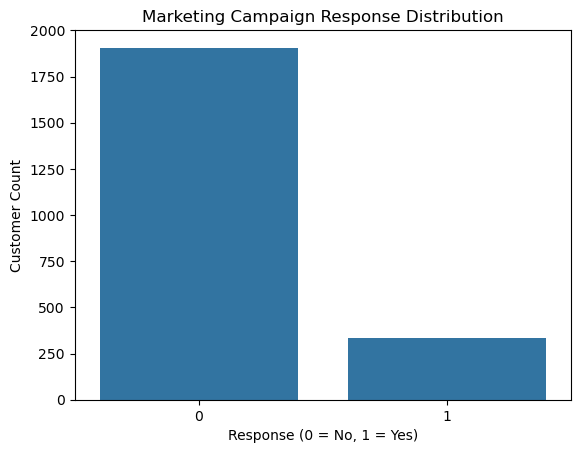


Majority of customers did not respond to the campaign, indicating a low overall conversion rate
and a need for better targeting strategies.


In [17]:
#Campaign Response Rate
sns.countplot(x="Response", data=df)
plt.title("Marketing Campaign Response Distribution")
plt.xlabel("Response (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.show()

print("\nMajority of customers did not respond to the campaign, indicating a low overall conversion rate\nand a need for better targeting strategies.")

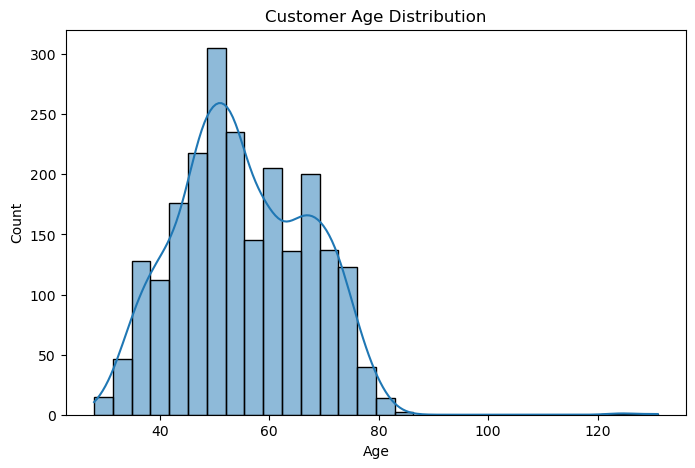


Most customers fall in the middle-aged group, suggesting campaigns should focus on working-age consumers.


In [18]:
#Age Distribution of Customers
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print("\nMost customers fall in the middle-aged group, suggesting campaigns should focus on working-age consumers.")

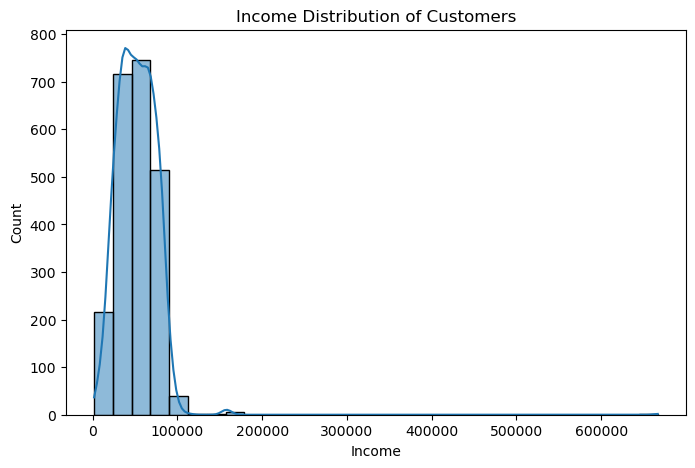


Income distribution is right-skewed, meaning a small segment of customers contributes to higher purchasing power.


In [19]:
#Income Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Income"], bins=30, kde=True)
plt.title("Income Distribution of Customers")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

print("\nIncome distribution is right-skewed, meaning a small segment of customers contributes to higher purchasing power.")

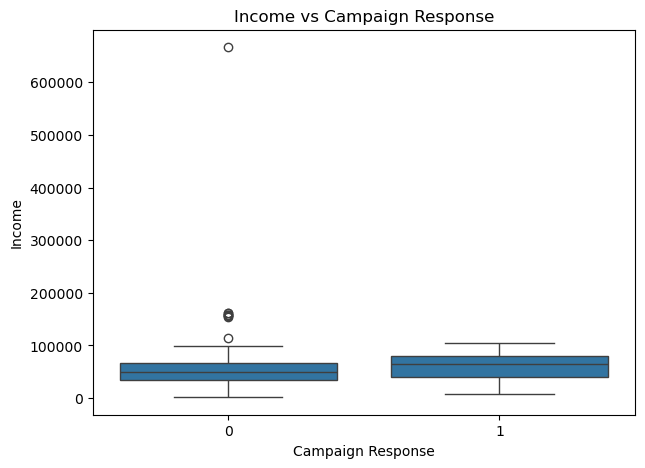

Customers who responded to the campaign generally have higher income levels, indicating income is a key factor in campaign success.


In [20]:
#Income vs Campaign Response
plt.figure(figsize=(7,5))
sns.boxplot(x="Response", y="Income", data=df)
plt.title("Income vs Campaign Response")
plt.xlabel("Campaign Response")
plt.ylabel("Income")
plt.show()

print("Customers who responded to the campaign generally have higher income levels, indicating income is a key factor in campaign success.")

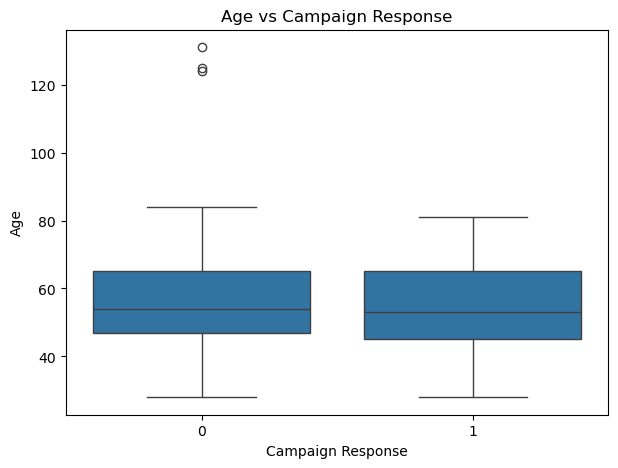

Campaign responses are more frequent among middle-aged customers compared to very young or older groups.


In [21]:
#Age vs Campaign Response
plt.figure(figsize=(7,5))
sns.boxplot(x="Response", y="Age", data=df)
plt.title("Age vs Campaign Response")
plt.xlabel("Campaign Response")
plt.ylabel("Age")
plt.show()

print("Campaign responses are more frequent among middle-aged customers compared to very young or older groups.")

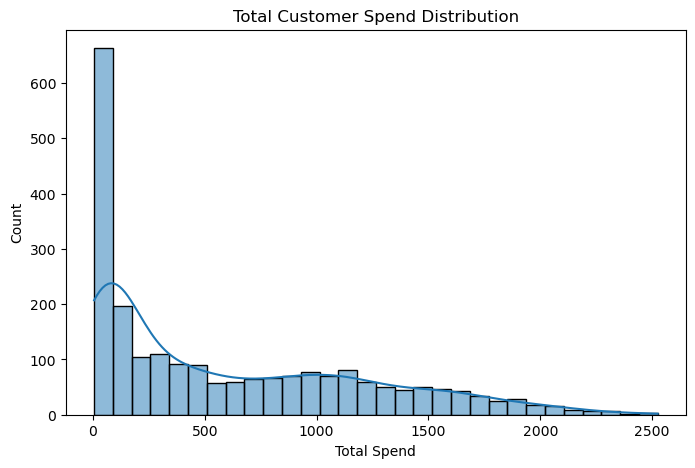

A small percentage of customers contribute to high overall revenue, following the Pareto principle.


In [22]:
#Total Spend Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Spend"], bins=30, kde=True)
plt.title("Total Customer Spend Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Count")
plt.show()

print("A small percentage of customers contribute to high overall revenue, following the Pareto principle.")

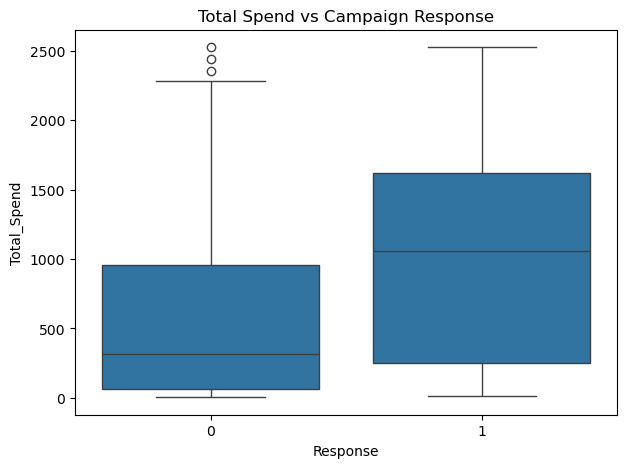


High-spending customers are more likely to respond to marketing campaigns.


In [23]:
#Total Spend vs Response
plt.figure(figsize=(7,5))
sns.boxplot(x="Response", y="Total_Spend", data=df)
plt.title("Total Spend vs Campaign Response")
plt.show()

print("\nHigh-spending customers are more likely to respond to marketing campaigns.")

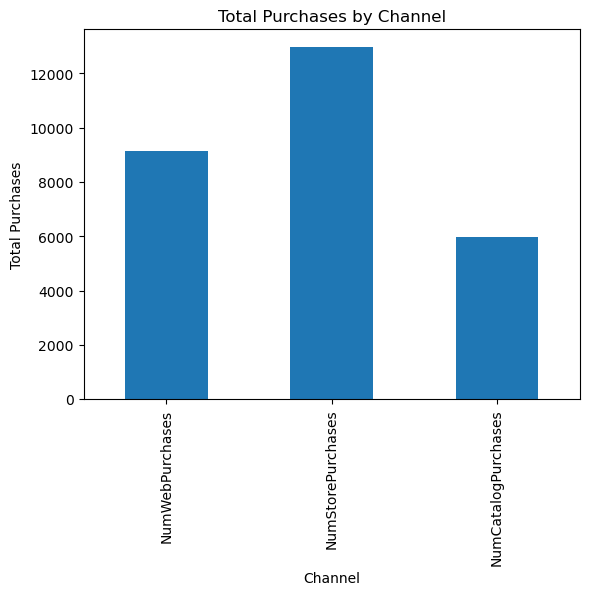

Store purchases dominate over web and catalog channels, suggesting offline channels remain strong.


In [24]:
#Channel Performance (Web / Store / Catalog)
channel_data = df[["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"]].sum()

channel_data.plot(kind="bar")
plt.title("Total Purchases by Channel")
plt.xlabel("Channel")
plt.ylabel("Total Purchases")
plt.show()

print("Store purchases dominate over web and catalog channels, suggesting offline channels remain strong.")

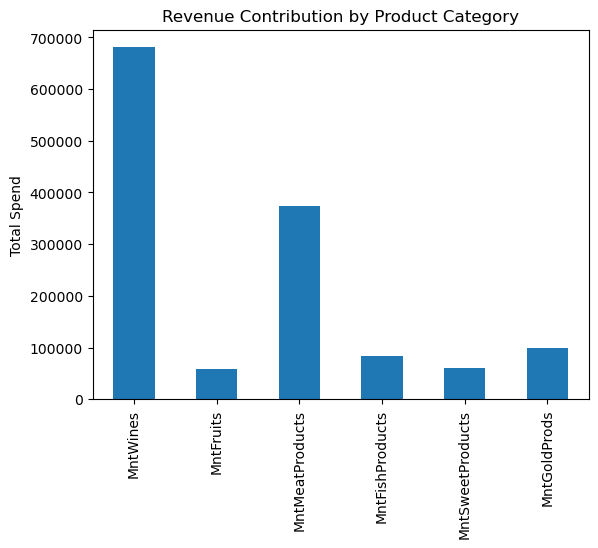

Wine and meat products generate the highest revenue among all product categories.


In [25]:
#Product Category Contribution
product_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

df[product_cols].sum().plot(kind="bar")
plt.title("Revenue Contribution by Product Category")
plt.ylabel("Total Spend")
plt.show()

print("Wine and meat products generate the highest revenue among all product categories.")

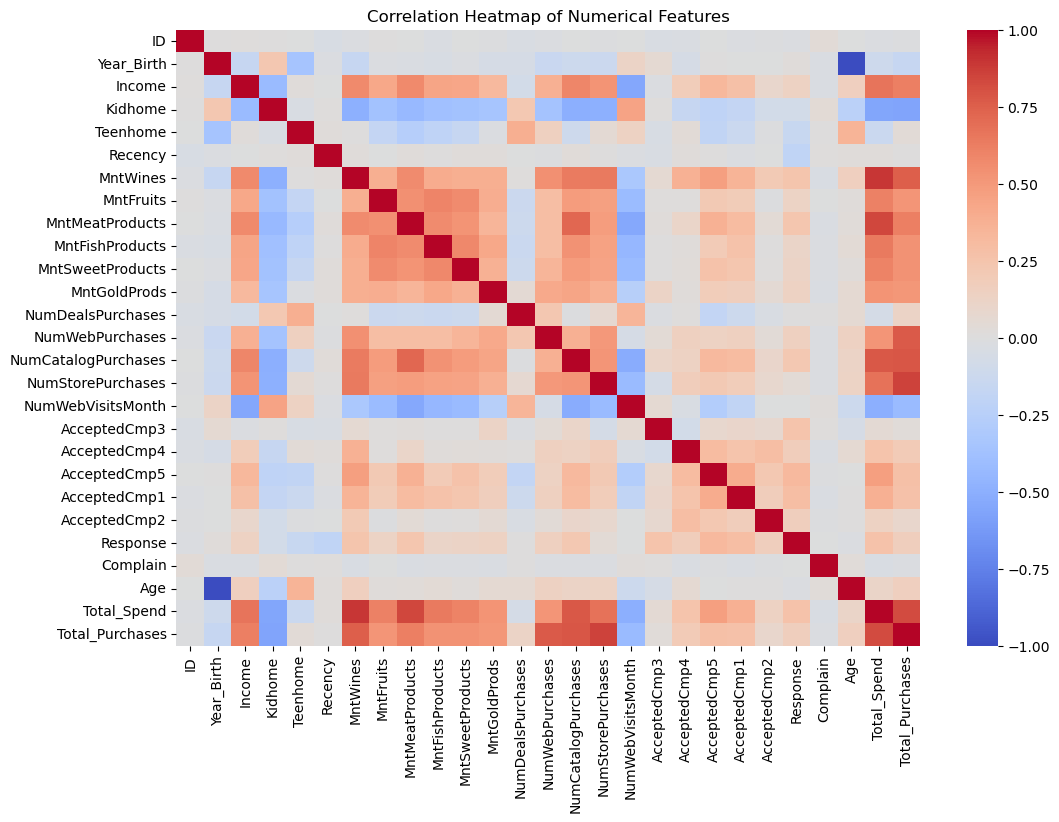

Income, total spend, and purchase count show strong positive correlation, confirming consistent buying behavior.


In [26]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

print("Income, total spend, and purchase count show strong positive correlation, confirming consistent buying behavior.")

In [28]:
df.to_csv('marketing_cleaned.csv', index=False)